<a href="https://colab.research.google.com/github/CodingEnigma/Systems_AI/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Подзагрузка файлов.

В ходе выполнения контрольной работы был использован датасет Cardiovascular_Disease_Dataset:
https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset

# 2. Чтение файла.

Посмотрим содержимое в папке /content/:


In [ ]:
# импортируем модуль 'os'
import os

# выведем пути к каталогам (dirpath) и имена файлов (filenames)
for dirpath, _, filenames in os.walk('/content/'):

  # проходим по именам файлов
  for filename in filenames:

    # объединяем пути к папкам и вложенным в них файлам
    print(os.path.join(dirpath, filename))

/content/Cardiovascular_Disease_Dataset.csv
/content/.config/.last_update_check.json
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/default_configs.db
/content/.config/logs/2024.01.11/17.01.50.905438.log
/content/.config/logs/2024.01.11/17.01.50.107332.log
/content/.config/logs/2024.01.11/17.01.23.878355.log
/content/.config/logs/2024.01.11/17.01.40.683538.log
/content/.config/logs/2024.01.11/17.01.32.816172.log
/content/.config/logs/2024.01.11/17.00.57.357130.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv


Код успешно просматривает все файлы в каталоге "/content/" и его подкаталогах, выводя полные пути к каждому из них. Один из файлов в этом каталоге - "/content/Cardiovascular_Disease_Dataset.csv.csv", представляет собой загруженный файл данных о сердечных заболеваниях получен в одной из многопрофильных больниц Индии.

Рассмотрим различные способы предоставления информации о файлах.



In [ ]:
# перечислим только видимые файлы и папки
!ls

Cardiovascular_Disease_Dataset.csv  sample_data


In [ ]:
# перечислим файлы из папки 'sample_data'
!ls /content/sample_data/

anscombe.json		     california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv		   README.md


In [ ]:
# откроем файл
file = open('/content/Cardiovascular_Disease_Dataset.csv', 'r')

# выведем первые 50 символов
print(file.read(50))

# закроем файл
file.close()

patientid,age,gender,chestpain,restingBP,serumchol


In [ ]:
# откроем файл
file = open('/content/Cardiovascular_Disease_Dataset.csv', 'r')

# создадим итератор строк
for i, line in enumerate(file):

  # выведем строку файла
  print(line.strip())

  # прервем цикл если достигнута 4 строка
  if i == 3:
    break

# закроем файл
file.close()

patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
119372,49,1,2,133,142,0,0,202,1,5,1,0,0


In [ ]:
# импортируем модуль 'pandas'
import pandas as pd

# посмотрим первые три записи файла
file = pd.read_csv('/content/Cardiovascular_Disease_Dataset.csv')
file.head(3)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0


# 3. Построение модели и прогноз.

Создадим небольшую модель, способную прогнозировать уровень оценки и предоставлять всесторонний анализ о сердечных заболеваниях.

**Шаг 1. Обработка и анализ данных.**

**Исследовательский анализ данных (EDA).**
Выявим взаимосвязь между признаками и целевой переменной.

In [ ]:
# воспользуемся методом '.info()' для обобщенного обзора наших данных.
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


Dataset содержит 1000 записей и 14 столбцов.

0. patientid - Идентификационный номер пациента
1. age - Возраст
2. gender - Пол [0 (женщина) / 1 (мужчина)]
3. chestpain - Артериальное давление в состоянии покоя [0 (типичная стенокардия), 1 (атипичная стенокардия), 2 (несангинальная боль), 3 (бессимптомное течение)]
4. restingBP - Сывороточный холестерин [126-564 (в мг/дл)]
5. serumcholestrol - Уровень сахара в крови натощак [0 (ложно) / 1 (верно) > 120 мг/дл]
6. fastingbloodsugar - Тип боли в груди [0 (нет), 1 (есть)]
7. restingrelectro [Результаты электрокардиограммы покоя - 0 (норма), 1 (аномалия ST-T), 2 (вероятная или определенная гипертрофия левого желудочка)]
8. maxheartrate - Достигнута максимальная частота сердечных сокращений [71-202]
9. exerciseangia - Стенокардия, вызванная физической нагрузкой [0 (нет) / 1 (да)]
10. oldpeak - Олдпик = ST [0-6,2]
11. slope - Наклон пикового сегмента ST при нагрузке [1 (вверх), 2 (плоский), 3 (вниз)]
12. noofmajorvessels - Количество крупных судов [0, 1, 2, 3]
13. target - Классификация (цель) [0 (отсутствие заболеваний сердца), 1 (наличие заболеваний сердца)]


Проведем визуальный анализ данных.

<Axes: xlabel='gender', ylabel='count'>

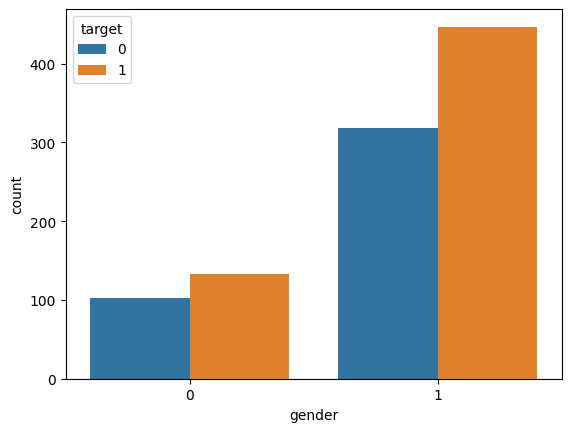

In [ ]:
# импортируем модуль 'seaborn'
import seaborn as sns

# посмотрим насколько значим возраст для итоговой оценки
sns.countplot(x = 'gender', hue = 'target', data = file)

Из результатов выполнения кода видно, что количество случаев заболеваний сердца среди мужчин превышает аналогичный показатель среди женщин.

<Axes: xlabel='exerciseangia', ylabel='count'>

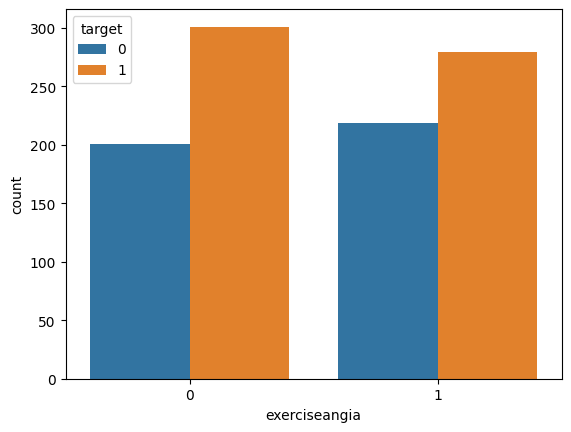

In [ ]:
# посмотрим насколько значима стенокардия, вызванная физической нагрузкой для итоговой оценки
sns.countplot(x = 'exerciseangia', hue = 'target', data = file)

При этом отмечено, что стенокардия, вызванная физической нагрузкой, не оказывает сильного влияния.

**Пропущенные значения.**

In [ ]:
# выявим пропущенные значения и посчитаем их количество
file.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

В результате выполнения кода не обнаружено пропущенных значений.

**Категориальные переменные.**


In [ ]:
# преобразуем категориальные переменные в индикаторные переменные, применяя кодировку one-hot
chestpain = pd.get_dummies(file['chestpain'], prefix='chestpain')
restingrelectro = pd.get_dummies(file['restingrelectro'], prefix='restingrelectro')
slope = pd.get_dummies(file['slope'], prefix='slope', drop_first=True)

# удалим исходные переменные до применения кодировки one-hot
file.drop(['chestpain', 'restingrelectro', 'slope'], axis = 1, inplace = True)

# присоединим переменные к исходному датафрейму 'file'
file = pd.concat([file, chestpain, restingrelectro, slope], axis = 1)

# переименуем новые переменные
file.rename(columns={'chestpain_0': 'chestpain_typical_angina'}, inplace=True)
file.rename(columns={'chestpain_1': 'chestpain_atypical_angina'}, inplace=True)
file.rename(columns={'chestpain_2': 'chestpain_non-anginal_pain'}, inplace=True)
file.rename(columns={'chestpain_3': 'chestpain_asymptomatic'}, inplace=True)
file.rename(columns={'restingrelectro_0': 'restingrelectro_normal'}, inplace=True)
file.rename(columns={'restingrelectro_1': 'restingrelectro_ST-T_Wave_Abnormalities'}, inplace=True)
file.rename(columns={'restingrelectro_2': 'restingrelectro_Left_Ventricular_Hypertrophy_(by_Estes_criteria)'}, inplace=True)
file.rename(columns={'slope_1': 'slope_upsloping'}, inplace=True)
file.rename(columns={'slope_2': 'slope_flat'}, inplace=True)
file.rename(columns={'slope_3': 'slope_downsloping'}, inplace=True)

# выведем первые три строки таблицы
file.head(3)

,patientid,age,gender,restingBP,serumcholestrol,fastingbloodsugar,maxheartrate,exerciseangia,oldpeak,noofmajorvessels,...,chestpain_typical_angina,chestpain_atypical_angina,chestpain_non-anginal_pain,chestpain_asymptomatic,restingrelectro_normal,restingrelectro_ST-T_Wave_Abnormalities,restingrelectro_Left_Ventricular_Hypertrophy_(by_Estes_criteria),slope_upsloping,slope_flat,slope_downsloping
0,103368,53,1,171,0,0,147,0,5.3,3,...,0,0,1,0,0,1,0,0,0,1
1,119250,40,1,94,229,0,115,0,3.7,1,...,1,0,0,0,0,1,0,1,0,0
2,119372,49,1,133,142,0,202,1,5.0,0,...,0,0,1,0,1,0,0,1,0,0


**Нормализация данных.**

In [ ]:
# импортируем класс 'StandardScaler'
from sklearn.preprocessing import StandardScaler

# создадим объект этого класса
scaler = StandardScaler()

# масштабируем и рассчитаем среднее арифмитическое и СКО
file[['restingBP', 'serumcholestrol']] = \
scaler.fit_transform(file[['restingBP', 'serumcholestrol']])

# посмотрим результат
print(file[['restingBP', 'serumcholestrol']])

     restingBP  serumcholestrol
0     0.642833        -2.352717
1    -1.928098        -0.622817
2    -0.625938        -1.280028
3    -0.458995        -0.124243
4     1.577717        -2.352717
..         ...              ...
995  -0.425606         0.283681
996  -0.292051        -0.403747
997   0.142002         0.925784
998   1.143664         0.797363
999   0.208780        -0.313097

[1000 rows x 2 columns]


**Шаг 2. Разделение обучающей выборки на признаки и целевую.**

In [ ]:
# импортируем модуль 'train_test_split'
from sklearn.model_selection import train_test_split

# разделяем на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(file.drop(columns=['target']), file['target'], train_size=0.8)

**Шаг 3. Обучение модели логической регрессии**

In [ ]:
# импортируем логистическую регрессию 'LogisticRegression'
from sklearn.linear_model import LogisticRegression

# создадим объект этого класса
model = LogisticRegression(max_iter=100000)

# обучим модель
model.fit(X_train, y_train)

# сделаем предсказание класса
y_pred_file = model.predict(X_train)

In [ ]:
# импортируем матрицу ошибок 'confusion_matrix'
from sklearn.metrics import confusion_matrix

# передадим фактические и прогнозные значения
conf_matrix = confusion_matrix(y_train, y_pred_file)

# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,0,337
1,0,463


In [ ]:
# импортируем метрику 'accuracy_score'
from sklearn.metrics import accuracy_score

# передадим фактические и прогнозные значения
model_accuracy = accuracy_score(y_train, y_pred_file)

# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.579

На обучающей выборке модель показала результат в 57,9%.

**Шаг 4. Построение прогноза на тестовых данных**

In [ ]:
# импортируем логистическую регрессию 'LogisticRegression'
from sklearn.linear_model import LogisticRegression

# создадим объект этого класса
model = LogisticRegression(max_iter=10000)

# обучим модель
model.fit(X_test, y_test)

# сделаем предсказание класса
y_pred_file = model.predict(X_test)

In [ ]:
# импортируем матрицу ошибок 'confusion_matrix'
from sklearn.metrics import confusion_matrix

# передадим фактические и прогнозные значения
conf_matrix = confusion_matrix(y_test, y_pred_file)

# преобразуем в датафрейм
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,0,83
1,0,117


In [ ]:
# импортируем метрику 'accuracy_score'
from sklearn.metrics import accuracy_score

# передадим фактические и прогнозные значения
model_accuracy = accuracy_score(y_test, y_pred_file)

# округлим до трех знаков после запятой
round(model_accuracy, 3)

0.585

На тестовой выборке модель показала результат в 58,5%.

# 4. Сохранение результата в новом файле на сервере

In [ ]:
# передадим индекс студентов
ids = X_test['patientid']

# создадим датафрейм из словаря, в котором
# первая пара ключа и значения - id студента,
# вторая - прогноз
result_file = pd.DataFrame({'patientid' : ids, 'target' : y_pred_file})

# посмотрим результат
result_file.head()

,patientid,target
538,5331000,1
188,1896631,1
336,3328780,1
157,1627834,1
514,5076312,1


In [ ]:
# создадим новый файл result.csv, удалив индекс
result_file.to_csv('result.csv', index = False)

print('Файл успешно сохранился в сессионное хранилище!')

Файл успешно сохранился в сессионное хранилище!
